# Predicting heart disease using machine learning 
This notebook looks into various Python-based ML and DS libraries in an attempt to build a machine learning model, project source: Daniel Bourke, Zero to Mastery, Andrei Neagoie

We're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiments

## Problem 

> Predict whether a patient has a heart disease or not (Classification) based on clinical data

## Dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Attributes used:
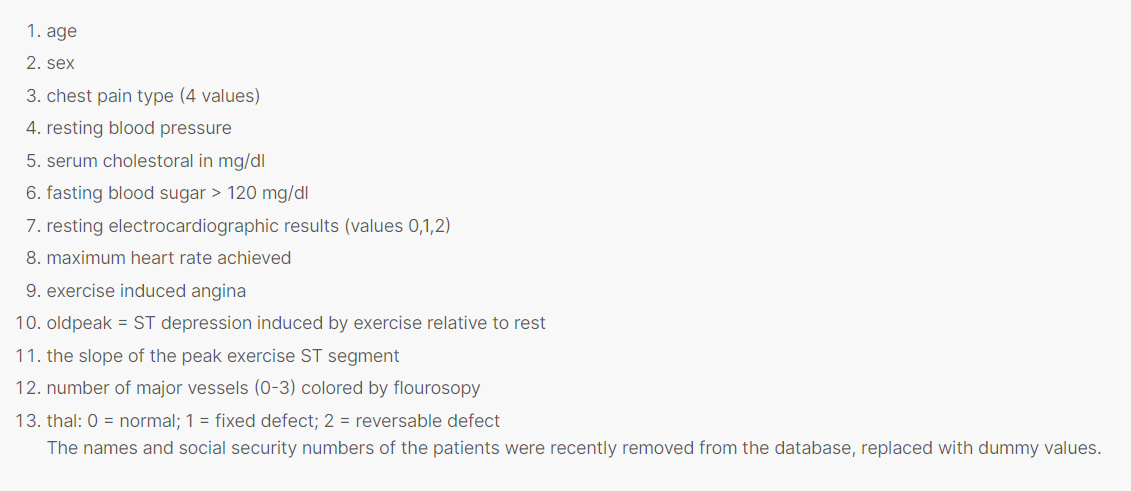
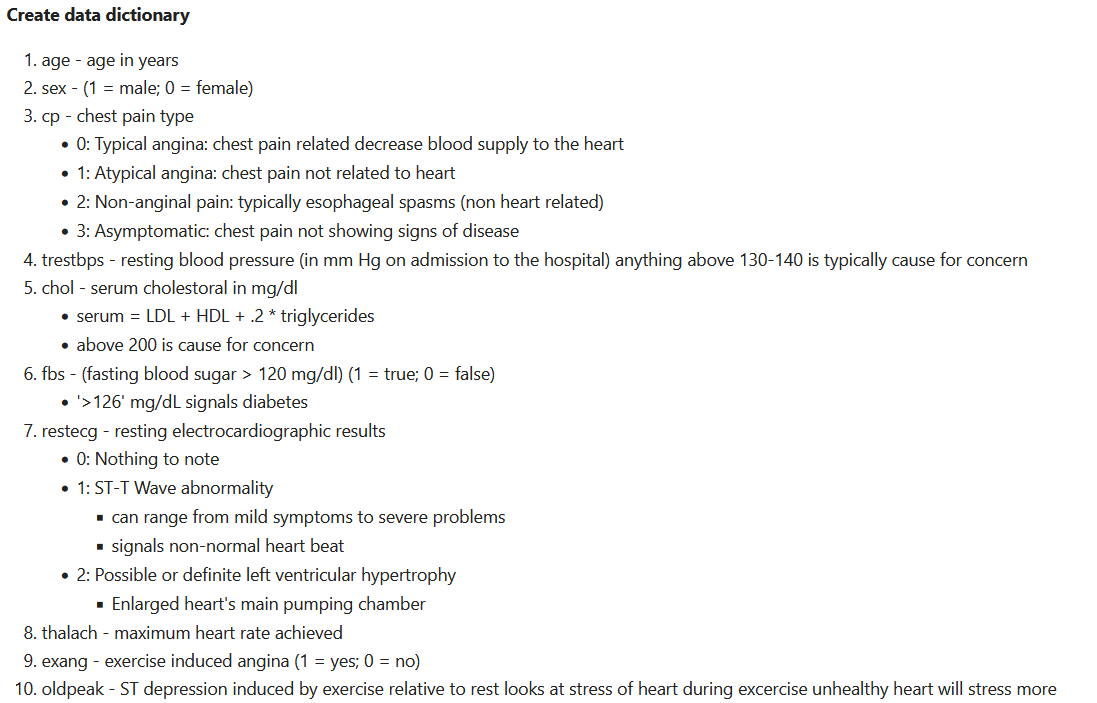
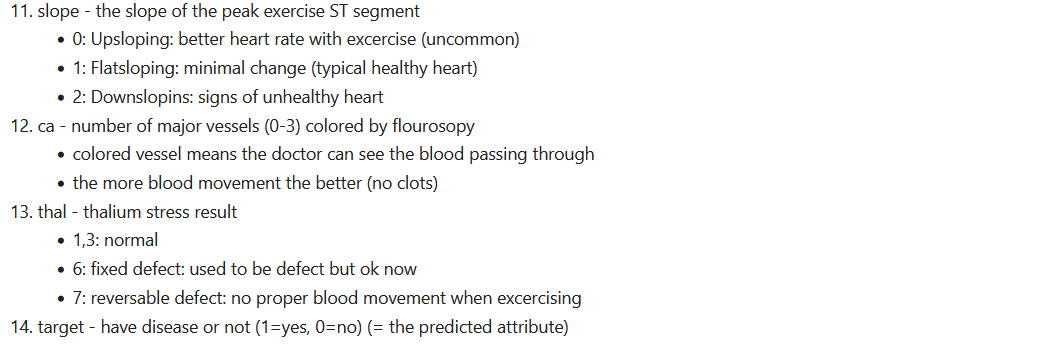

## 3. Evaluation
> If a 95% accuracy is attainable during proof of concept , the project shall be pursued

## 4. Features
* What features do we model?
* Are all features in the dataset really contributing to the target variable?

In [55]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve

In [56]:
# Load data
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (EDA)
The goal here is to find more about the data and become a subject matter expert on the dataset we are working on

This is done to give possible reasons for our predictions, detect under/overfitting
1. What kind of question(s) are being solved?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them? (Maybe due to entry error or actual outlier)
5. How can you add, change or remove features to get more out of your data?

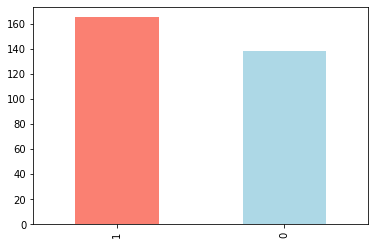

In [57]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [58]:
df.isna().sum()
df.describe()
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [59]:
# Compare target column with sex column (male = 1, female=0)
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [60]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [61]:
# roughly 75 out of a 100 women in our dataset have heart disease, emphasis on our dataset

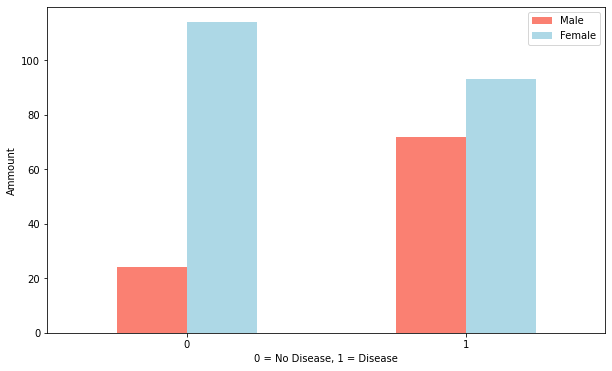

In [62]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Ammount")
plt.legend({"Female", "Male"})
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

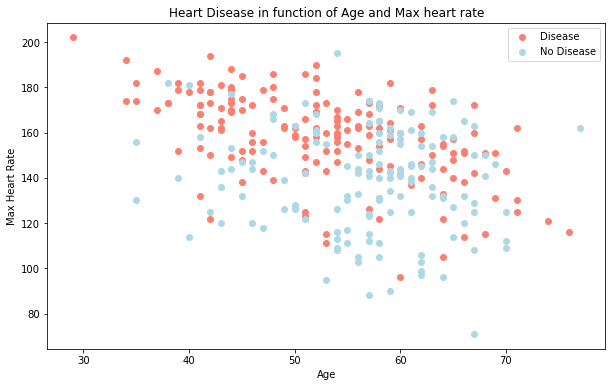

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon");
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue");
plt.title("Heart Disease in function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

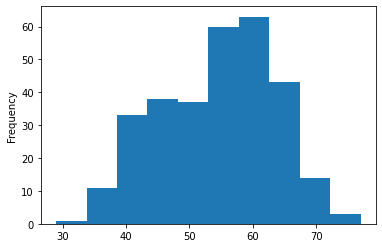

In [64]:
# Check distribution of age column with a histogram 
df.age.plot.hist();
# Best ways to judge outliers

### Heart Disease frequency per chest type 

In [65]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


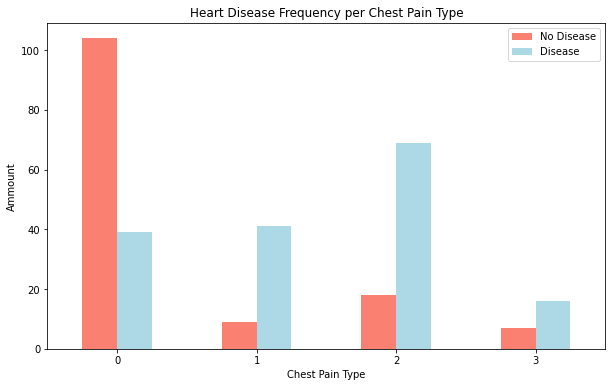

In [66]:
# Apparently non heart related pain have a high chance of having a heart disease (?) dosn't really make sense
# for a data scientist, one could search up for its possible reasons, reach out to someone etc.., this is a part of EDA
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Ammount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [67]:
# Create a co-relation matrix to check how the variables coreleate with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


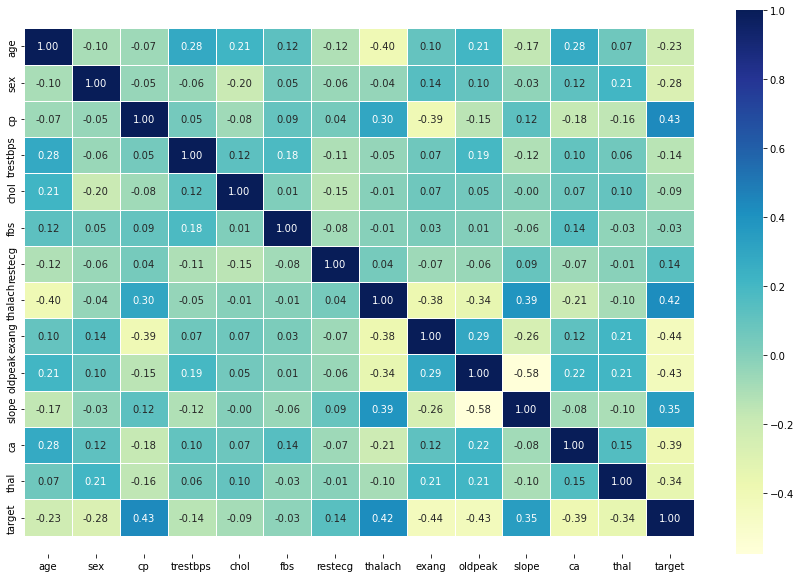

In [68]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [69]:
# Higher positive value => Higher positive corelation, Higher negative value => Higher negative corelation
# So as cp goes up, the target value also goes up

## 5. Modelling

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
X = df.drop("target", axis=1)
y = df["target"]

In [72]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
# Select a model using scikit learn ML map

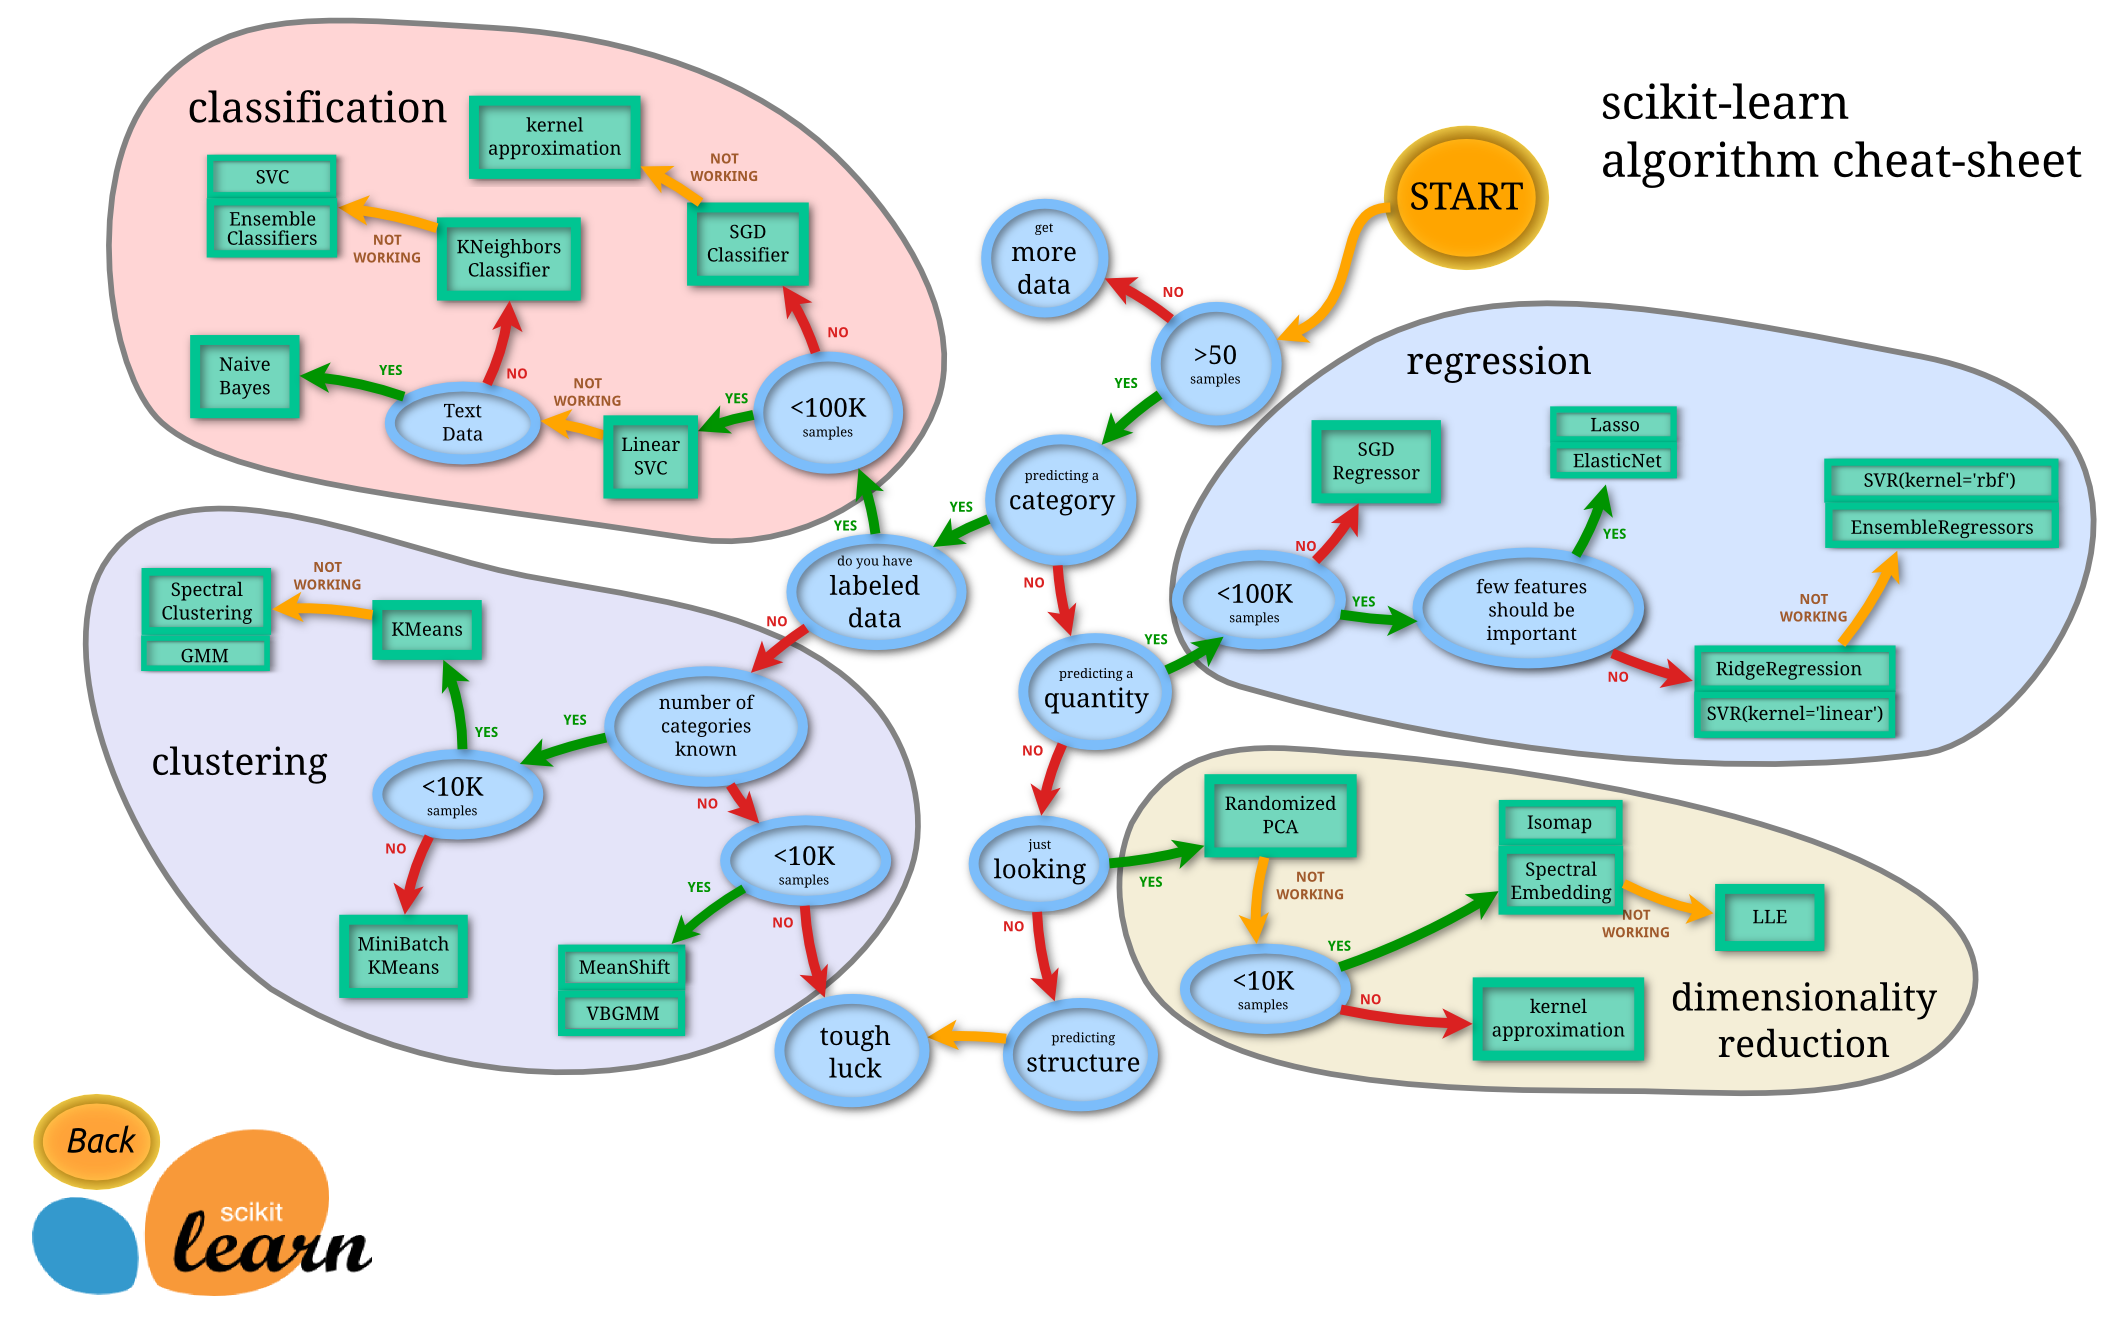

In [74]:
len(df)

303

Lets try using:
1. Logistic Regression
2. K-Neighbors Classifier
3. Random Forest Classifier

In [75]:
# Why use regression for classification? research

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
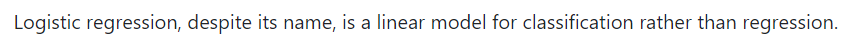

In [76]:
# Setup a dictionary for setting them up in a model rather than writing them again
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates models
    models = dict of scikit learn ML Models,
    train = training data, test= test data
    """
    np.random.seed(42)
    # Dictionary of scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [77]:
scores = fit_and_score(models=models,
                       X_train=X_train, 
                       X_test=X_test, 
                       y_train=y_train,
                       y_test=y_test)
scores

C:\Users\Bassam Adnan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [78]:
# Logistic Regression seems to do pretty well, infact the warning says it may be improved, however experiments shall be made

# Model Comparision

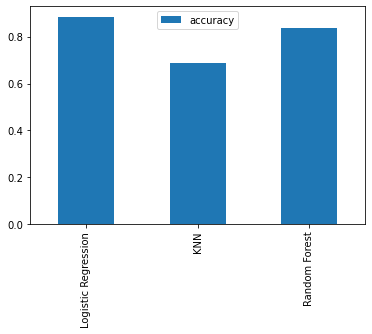

In [79]:
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

These are still baseline predictions, the model may be improved

The following shall be observed:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under Curve (AUC)
The first 2 are essential for almost any ML model, the rest are specefic to classification.

Max KNN score on the test data = 75.41%


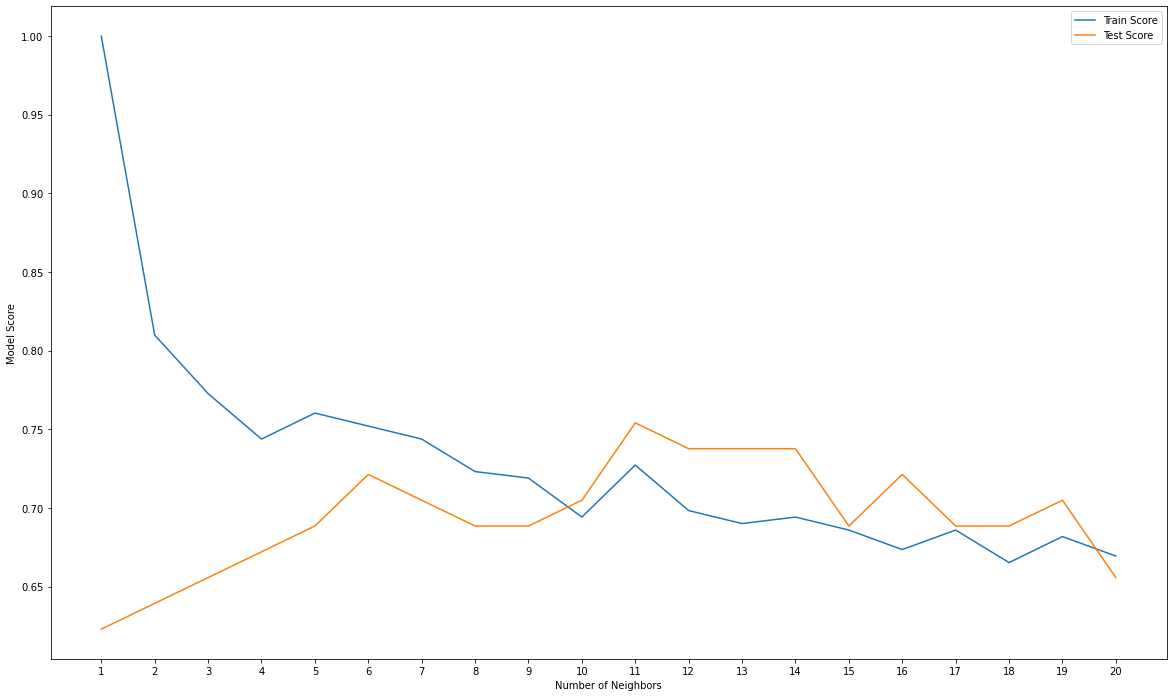

In [80]:
# Start with tuning KNN model
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

# Loop through different n_neihbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
plt.rcParams["figure.figsize"] = (20,12)
plt.plot(neighbors, train_scores, label="Train Score")
plt.xticks(np.arange(1, 21, 1))
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
print(f"Max KNN score on the test data = {max(test_scores)*100:.2f}%")
plt.legend();


Even after tuning KNN , it only goes upto 75% , still far away from Logistic Regression, perhaps its not worth putting effort into it anymore.

# Hyperparameter Tuning with RSCV
Tune:
* Logistic Regression
* Random Forest Classifier

In [81]:
# Creating a hyperparameter grid for logistic regression, from documentation,
# "It is highly reccomended to use cont distributions for continous parameters" -RSCV
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}
    
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [83]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [87]:
# Original result = 88.5% , equal to the hypertuned value

Tuning the Random Forest Classifier

In [88]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [89]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [91]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [92]:
# Beats the initial (83 % obtained originally with default params), stil behind the Logistic Regression
# Lets stick to logistic regression

# Hyperparameter Tuning with GSCV 
Used on our Logistic Regression model

In [93]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [94]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [97]:
gs_log_reg.score(X_test, y_test)
# Still 88.5 , lets use these params and evaluate

0.8852459016393442

In [107]:
y_preds = gs_log_reg.predict(X_test)

# Evaluating beyond accuracy

* ROC and AUC
* Confusion Matrix
* Precision
* Recall
* Classification report
* F1- Score

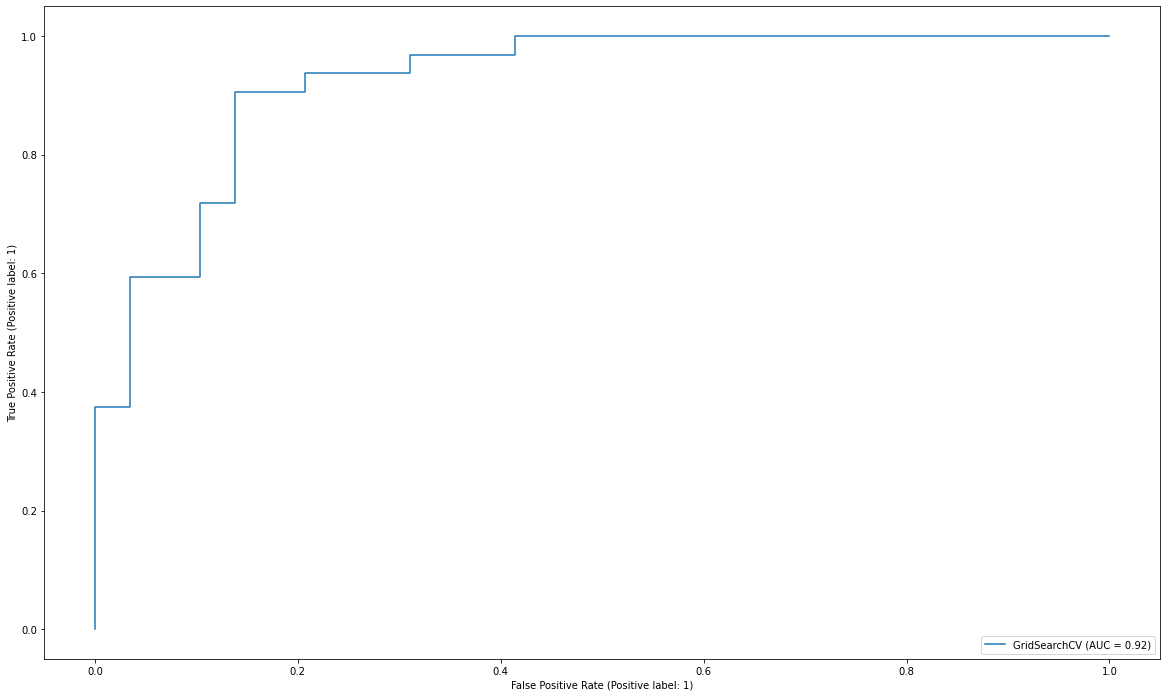

In [105]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay
roc = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

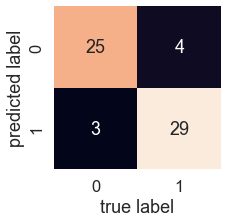

In [108]:
# Confusion matrix
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [110]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [111]:
# Make a cross validation score of precision, recall and f1

## Just as a refresher
**precision**: proportion of proper identifaction (which were actually correct), so a model which predicts no false positives would have a precision of 1.0 (the 3 would be 0 in the above confusion matrix in that case)

**recall**: model which produces no false negatives has a recall of 1 (4 would be 0 in the confusion matrix)

**f1-score**: would be 1 if precision and recall would be 1, kind of like the average

**support**: number of samples each metric was counted on. 

**macro avg**: average precision, recall and f1-score between classes, it does not take class imbalance into account (cases where number of 0's outnumber the number of 1's by a large ammount)

**weighted avg**: each metric is calculated w.r.t how many samples there are with each class (weighted- key word)

### Calculate evaluation metrics using cross validation
So far we have only used our parameters on a single partition of our dataset, cross validation may give us an idea of how our model performs on different partitions of the same dataset

In [112]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [113]:
# New classifier with the best parameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [118]:
# C.V'ed accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc
# performs as good as 90%, as low as 75% (do note the results are reproduceable as we are using a random seed)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [121]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [122]:
# C.V'ed precision
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [123]:
# CV'ed recall-score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [124]:
# CV'ed f1-score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

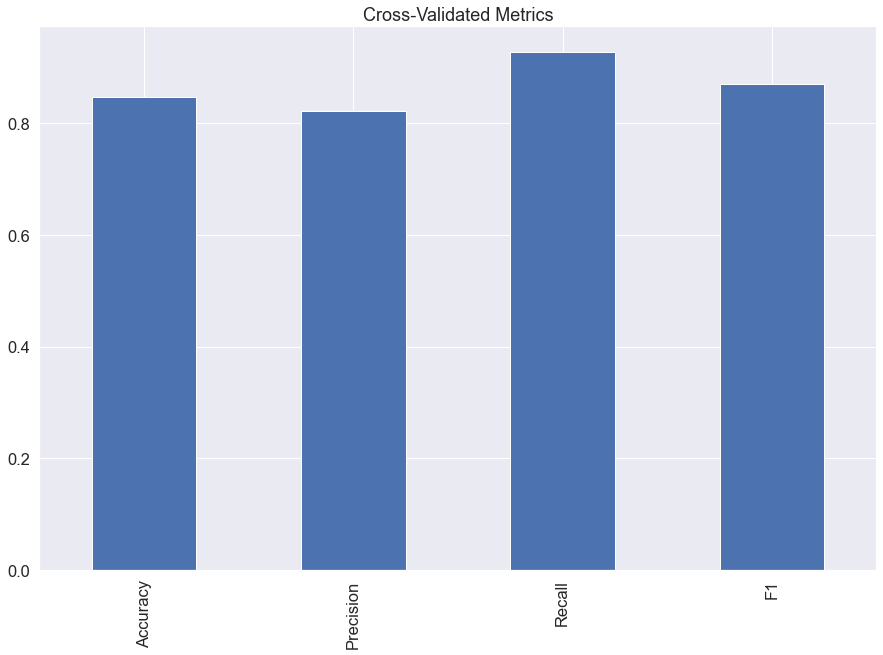

In [126]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
plt.rcParams["figure.figsize"] = (15,10)
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# Feature Importance
How to determine the importance of certain features on detecting heart disease? Which features contributed the most and the least?

To determine the feature importance it is often a good idea to search "(Model name) feature importance"

In [129]:
clf.fit(X_train, y_train)
clf.coef_
# Coefficients which contributes to the labels in our dataframe

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [130]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

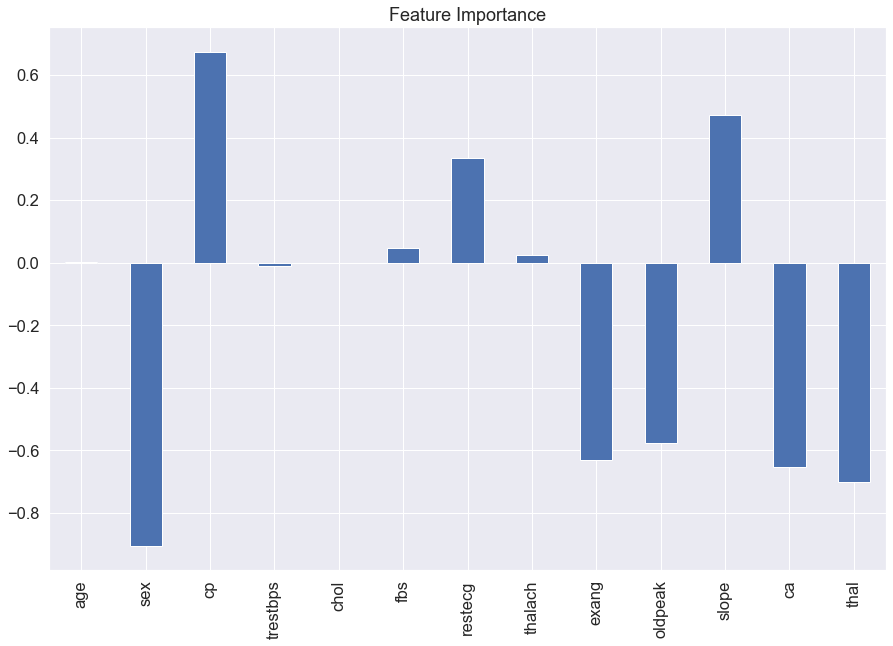

In [134]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);


In [136]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [138]:
pd.crosstab(df["slope"], df["target"]) # As it increases, the no of samples (1) should increase

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


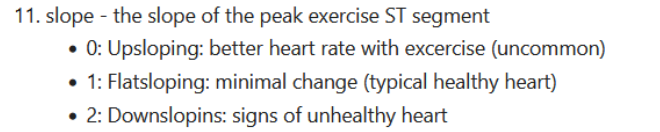

In [139]:
# Makes sense

# What next?
Reviewing a few hyperparameters, exploring more machine learning models, improving accuracy of predictions. Posts on kaggles go over 93% accuracy. For important project such as classifying heart diseases, accuracy must be peaked.

What can be done:
* Try a better model (perhaps CatBoost or XGBoost)
* Improve the current model
* Collect more data

This is an essential part of Experimentation which we have been doing since modelling our data, going beyond this, is a part of experimentation as well.